### 9.1 Model Evaluation

Metric: to quantify the performance of a constructed model
- e.g. accuracy, precision, $F_1$ score, Area Under the Receiver Operating Characteristic Curve (AUROC, or ROC AUC)

Rule: the procedure that is used to estimate a metric
- e.g. hold-out, resubstitution, cross-validation, bootstrap

#### 9.1.1 Model Evaluation Rules

- Hold-out estimator
- Resubstitution
- Bootstrap
- Cross-validation (CV)
  - Standard K-fold CV
  - Leave-one-out
  - Stratified K-fold CV
  - Shuffle and Split (Random Permutation CV)

##### Hold-out Estimator

- Split to training set ($l$) and test set ($m$), $l+m=n$
- Common to take $m \approx 0.25n$
- Its use in small sample (sample size with respect to feature size is relatively small) could be harmful for both the training stage and the evaluation process
- To remove the harmful impact of holding out a portion of $\mathbf{S}_{tr,n}$ for testing in small-sample is once $\hat{\epsilon}_h$ is obtained, we apply $\Psi$ to the entire dataset $\mathbf{S}_{tr,n}$ to train a classifier $\Psi_{n}(\mathbf{x})$ but still use  $\hat{\epsilon}_h$, which was estimated on $\mathbf{S}_{te,m}$ using  $\Psi_{l}(\mathbf{x})$, as the performance of  $\Psi_{n}(\mathbf{x})$

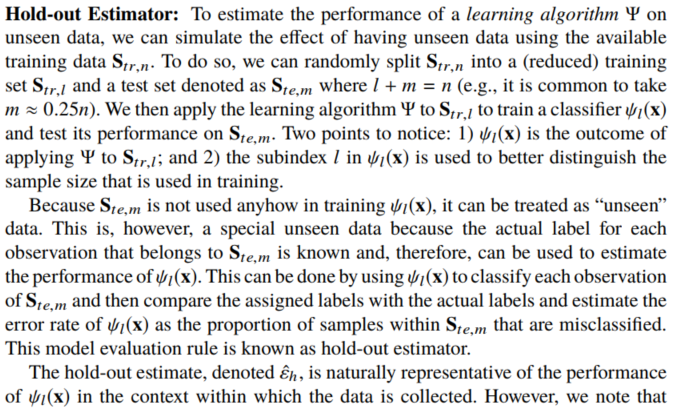

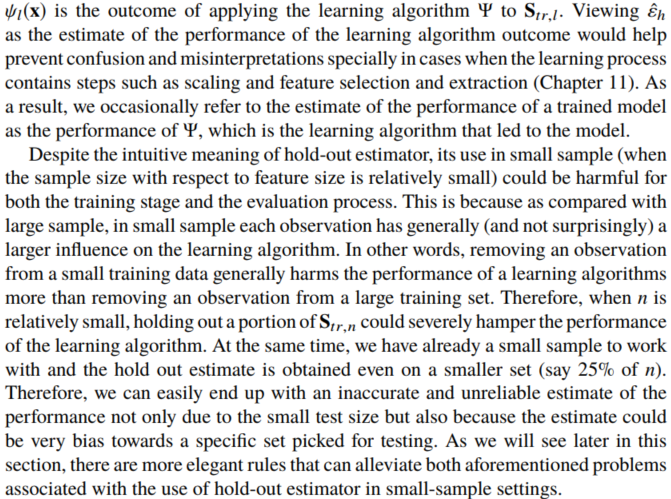

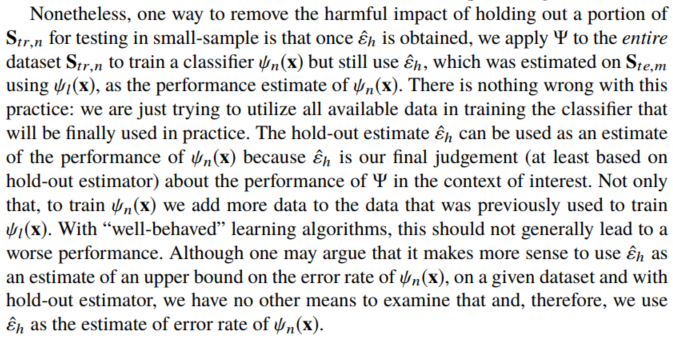

##### Resubstitution Estimator

- Evaluate the model on the same dataset that was used to train the model
- It can lead to overly optimistic estimates of model performance because it does not account for the model's ability to generalize to unseen data

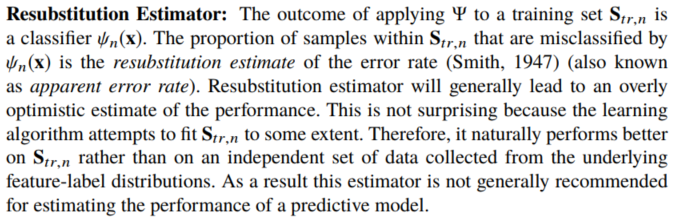

##### Bootstrap

- $B$ bootstrap samples, denoted $\mathbf{S}^{*}_{tr, n, k}, k=1,2,\dots,B$ are created by randomly drawing $n$ observations with replacements from $\mathbf{S}_{tr,n}$
- Treat the observations that do not appear in $\mathbf{S}^{*}_{tr, n, k}$ as test data for a model that is trained using $\mathbf{S}^{*}_{tr, n, k}$

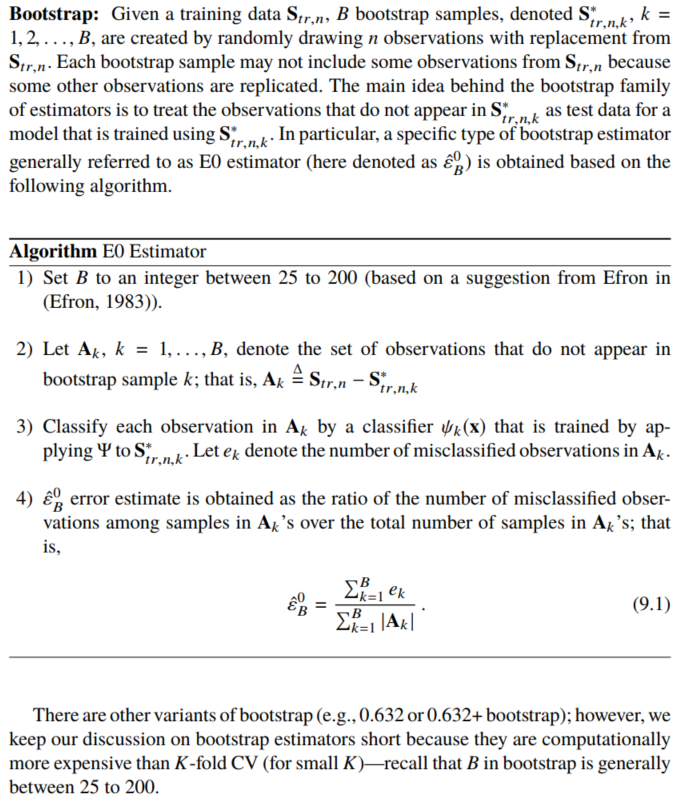

##### Cross-validation

**Standard K-fold CV**

Problems:
- The held-out folds (i.e. $\text{Fold}_1$ and $\text{Fold}_2$) only contain data from Class 0. This means the performance of the surrogate classifier is only relevant in predicting instances of Class 0
- To train a surrogate classifier, the training data may not include data from all classes, e.g. iteration 5

We can shuffle the data before dividing them into $K$ folds to alleviate the issue. However, to shuffle the data, we need to assume that samples within each class are i.i.d.

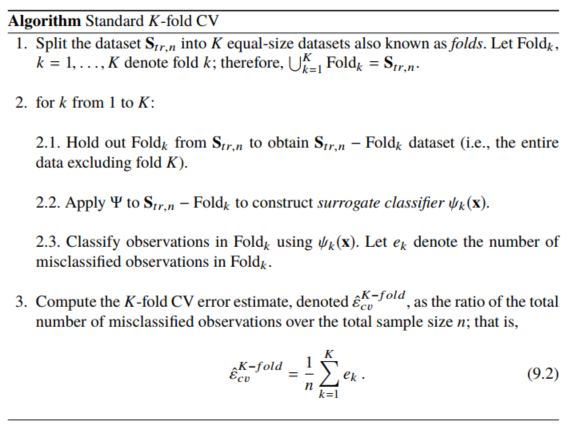

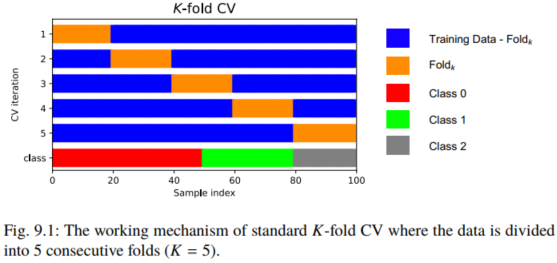

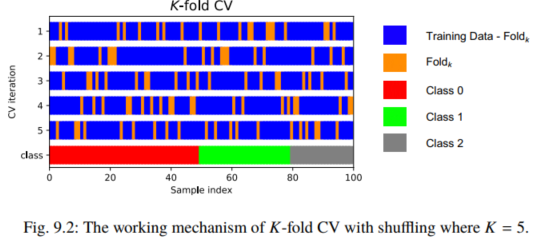

**Leave-one-out (loo)**
- $K=n$, the data is divided into $n$ folds where each fold contatins only one observation
- Feasible when $n$ is not large
- loo has larger variance, lower bias with respect to K-fold CV

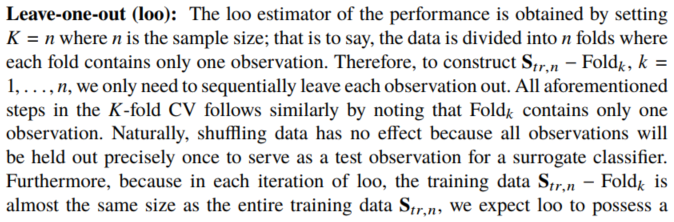

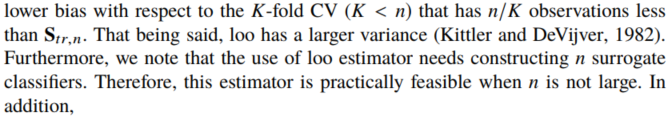

**Stratified K-fold CV**

- We should keep the proportion of samples from each class in the training set and the held out fold similar to the full training data

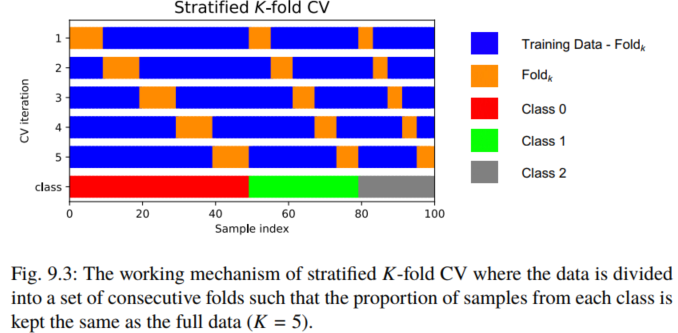

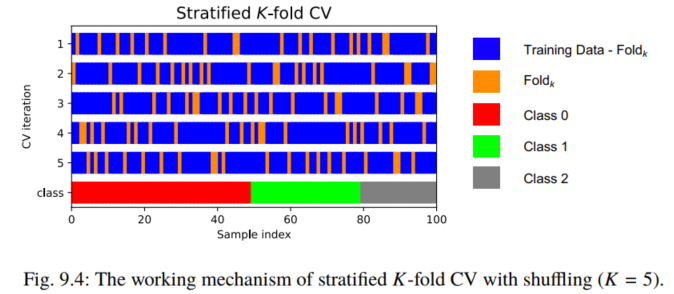

**Shuffle and Split (Random Permutation CV)**

Suppose we have a training dataset that is quite large in terms of sample size and, at the same time, we have a computationally intensive $\Psi$ to evaluate:
- We randomly choose a subset of the entire dataset for training and testing, and repeat this procedure $K$ times
- 50% training, 20% testing, 30% unused

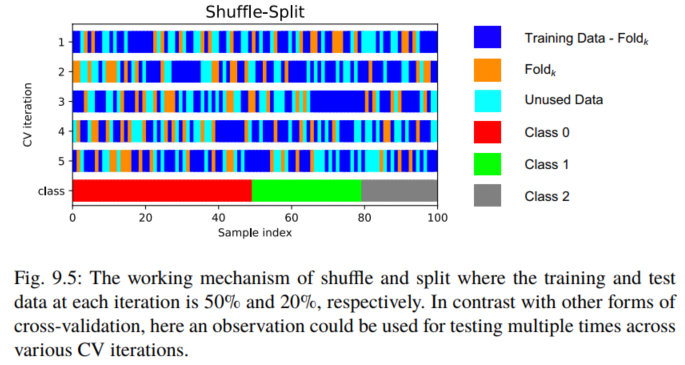

##### Example

K-fold CV

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN

# load training data
iris = datasets.load_iris()
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=100, test_size=0.2, stratify=iris.target)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
+ '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: '+ str(y_test.shape) + '\n')

# to set up the K-fold CV splits
K_fold = 3
kfold = KFold(n_splits=K_fold, shuffle=True, random_state=42) # shuffling is used
cv_scores = np.zeros(K_fold)
knn = KNN()
for counter, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train)):
  print("K-fold CV iteration " + str(counter+1))
  print("Train indices:", train_idx)
  print("Test indices:", test_idx, "\n")
  X_train_kfold = X_train[train_idx,]
  y_train_kfold = y_train[train_idx,]
  X_test_kfold = X_train[test_idx,]
  y_test_kfold = y_train[test_idx,]
  cv_scores[counter] = knn.fit(X_train_kfold, y_train_kfold).score(X_test_kfold, y_test_kfold)
  print("the accuracy of folds are: ", cv_scores)
  print("the overall 3-fold CV accuracy is: {:.3f}".format(cv_scores.mean()))

X_train_shape: (120, 4)
X_test_shape: (30, 4)
y_train_shape: (120,)
y_test_shape: (30,)

K-fold CV iteration 1
Train indices: [  1   2   3   5   6   7   8  13  14  16  17  19  20  21  23  25  27  28
  29  32  33  34  35  37  38  39  41  43  46  48  49  50  51  52  54  57
  58  59  60  61  63  66  67  68  69  71  72  74  75  77  79  80  81  82
  83  84  85  86  87  90  92  93  94  95  98  99 100 101 102 103 105 106
 108 111 112 113 115 116 117 119]
Test indices: [  0   4   9  10  11  12  15  18  22  24  26  30  31  36  40  42  44  45
  47  53  55  56  62  64  65  70  73  76  78  88  89  91  96  97 104 107
 109 110 114 118] 

the accuracy of folds are:  [0.975 0.    0.   ]
the overall 3-fold CV accuracy is: 0.325
K-fold CV iteration 2
Train indices: [  0   1   2   4   9  10  11  12  14  15  18  20  21  22  23  24  26  29
  30  31  32  36  37  40  41  42  44  45  47  48  51  52  53  55  56  57
  58  59  60  61  62  63  64  65  70  71  73  74  75  76  78  79  81  82
  86  87  88  89  91  9

In [6]:
from sklearn.model_selection import cross_val_score
#kfold = KFold(n_splits=K_fold, shuffle=True, random_state=42) #  kfold is already instantiated from this line that we had before
knn = KNN()
cv_scores = cross_val_score(knn, X_train, y_train, cv=kfold)
print("the accuracy of folds are: ", cv_scores)
print("the overall 3-fold CV accuracy is: {:.3f}".format(cv_scores.mean()))

the accuracy of folds are:  [0.975 0.975 0.95 ]
the overall 3-fold CV accuracy is: 0.967


Stratified K-fold CV

In [9]:
# no shuffle by default
cv_scores = cross_val_score(knn, X_train, y_train, cv=3)
print("the accuracy of folds are: ", cv_scores)
print("the overall 3-fold CV accuracy is: {:.3f}".format(cv_scores.mean()))

the accuracy of folds are:  [0.925 0.95  1.   ]
the overall 3-fold CV accuracy is: 0.958


In [8]:
from sklearn.model_selection import StratifiedKFold
strkfold = StratifiedKFold(n_splits=K_fold, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X_train, y_train, cv=strkfold)
print("the accuracy of folds are: ", cv_scores)
print("the overall 3-fold CV accuracy is: {:.3f}".format(cv_scores.mean()))

the accuracy of folds are:  [0.925 1.    1.   ]
the overall 3-fold CV accuracy is: 0.975


Shuffle and Split (Random Permutation CV)

In [11]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=K_fold, random_state=42)
cv_scores = cross_val_score(knn, X_train, y_train, cv=strkfold)
print("the accuracy of folds are: ", cv_scores)
print("the overall 3-fold CV accuracy is: {:.3f}".format(cv_scores.mean()))

the accuracy of folds are:  [0.925 1.    1.   ]
the overall 3-fold CV accuracy is: 0.975


#### 9.1.2 Evaluation Metrics for Classification

Suppose a training set $\mathbf{S}_{tr,n}$ is available to train a binary classifier $\psi$. 

$\psi$ maps realizations of random feature vector $\mathbf{X}$ to realizations of a class variable $Y$ that takes two values "P" (atypical) and "N" (typical), i.e. $\psi (\mathbf{X}): \mathbb{R}^p \rightarrow \{\text{P}, \text{N}\}$, where $p$ is the dimensionality of $\mathbf{X}$.

The mapping produced by $\psi (\mathbf{X})$ from $\mathbb{R}^p$ to $\{\text{P}, \text{N}\}$ has an intermediary step. Suppose $\mathbf{x}$ is a realization of $\mathbf{X}$. The classification is performed by first mapping $\mathbf{x} \in \mathbb{R}^p$ to $s(\mathbf{x})$, which is a *score* on a univariate continuum such as $\mathbb{R}$.

The score $s(\mathbf{x})$ is then compared to $t$, which is a specific value of threshold $T$. We assume scores are oriented such that if $s(\mathbf{x})$ exceeds $t$, then $\mathbf{x}$ is assigned to $\text{P}$ and otherwise to $\text{N}$.

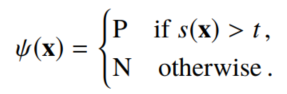

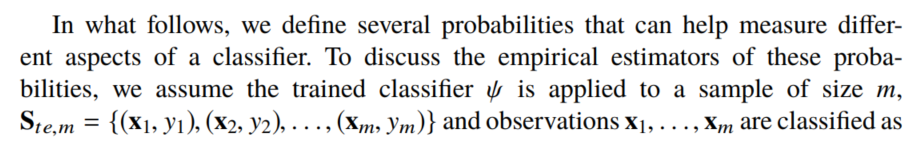

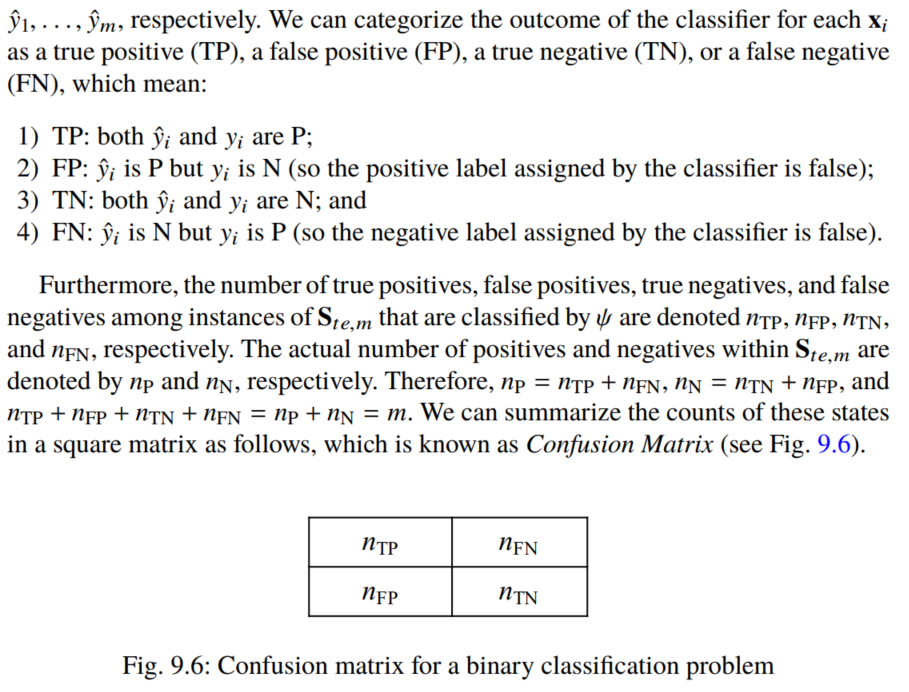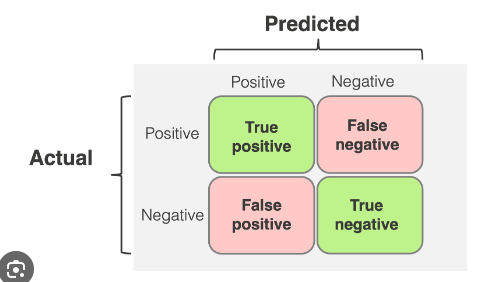


Precision, Recall, Accuracy

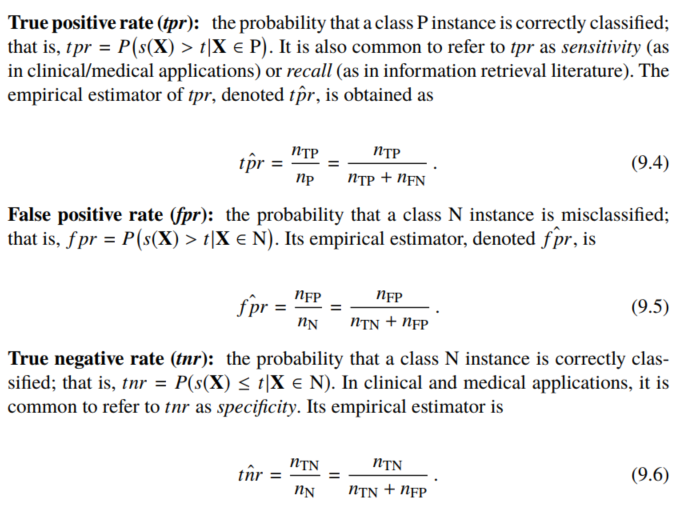

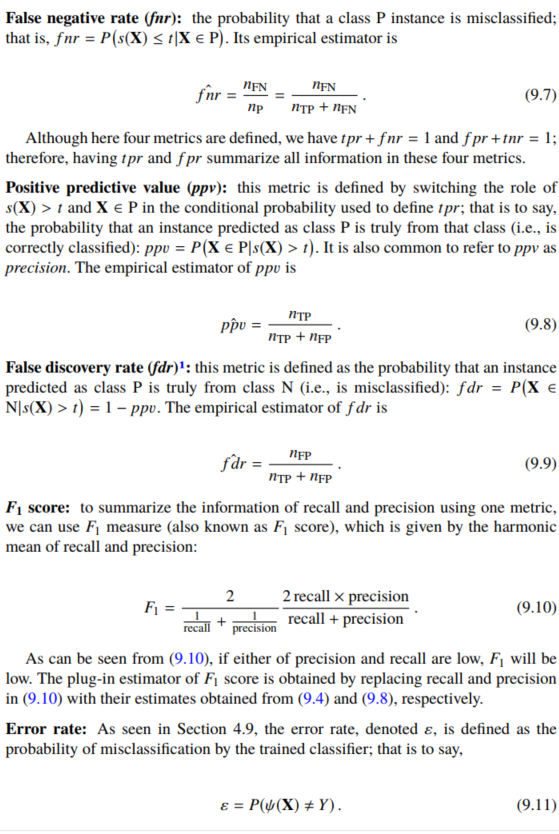

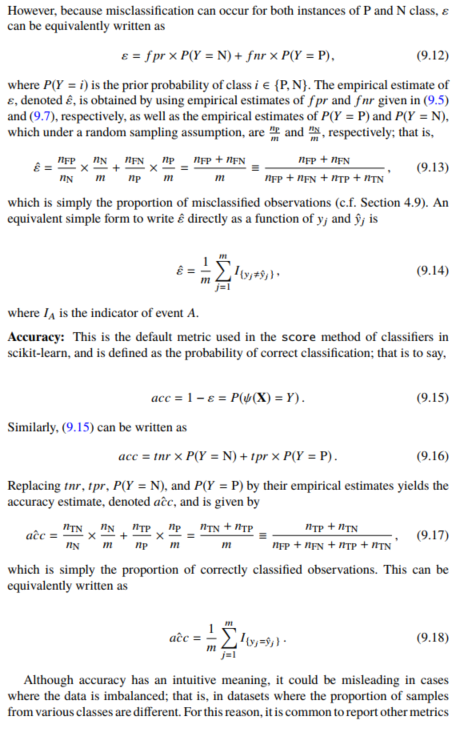

- Accuracy could be misleading in class imbalance
- Precision: when cost of FP is high, e.g. spam email detection, minimize the number of legitmate emails marked as spam
- Recall: when cost of FN is high, e.g. cancer diagnostic classificatoin, minimize the number of cancer patients who are not identified
- F1: no preference between precision and recall

Area Under the Receiver Operating Characteristic Curve (ROC AUC)

All the aforementioned metrics depend on $t$, which is the specific value of threshold used in a classifier. However, depending on the context that a trained classifier will be used in the future, we may decide to change this threshold at the final stage of clasification, which is a fairly simple adjustment, for example, to balance recall and precision depending on the context.

Then the question is whether we can evaluate a classifier over the entire range of the threshold used in its structure rather than a specific value of the threshold. To do so we can evaluate the classifier by the Receiver Operating Characteristic (ROC) curve and the Area Under the ROC Curve (AUC).

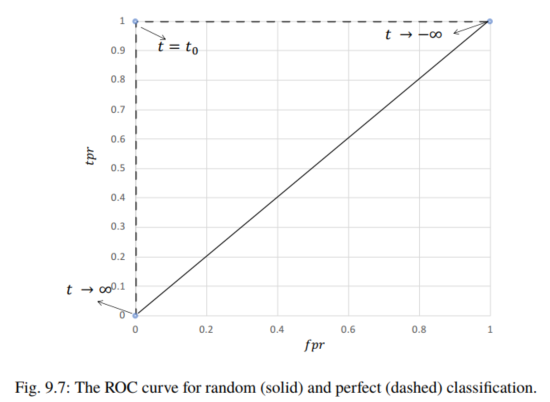

- ROC curve is obtained by varying $t$ over its entire range and plotting pairs of $(fpr, tpr)$
- The more $p(s(\mathbf{X}) | \mathbf{X} \in P)$ and $p(s(\mathbf{X}) | \mathbf{X} \in N)$ differ, the less likely in general the classifier misclassifies observations.
- If $p(s(\mathbf{X}) | \mathbf{X} \in P) = p(s(\mathbf{X}) | \mathbf{X} \in N)$, then $p(s(\mathbf{X}) > t| \mathbf{X} \in P) = p(s(\mathbf{X}) > t | \mathbf{X} \in N), \forall t$. This situation corresponds to random classification and the ROC curve becomes the straight line connecting $(0,0)$ to $(1,1)$. The area under the ROC curve is 0.5.
- Perfect classification: $p(s(\mathbf{X}) > t_0 | \mathbf{X} \in P) = 1$ and $p(s(\mathbf{X}) > t_0 | \mathbf{X} \in N) = 0$. Then $p(s(\mathbf{X}) | \mathbf{X} \in P)$ and $p(s(\mathbf{X}) | \mathbf{X} \in N)$ are on $(t_0, \infty)P$ and $(-\infty, t_0]$ intervals, respectively. In this case, the ROC AUC is 1.
- ROC AUC is equivalent to the probability that a randomly chosen member of the positive class is ranked higher (the score is larger) than a randomly chosen member of the negative class

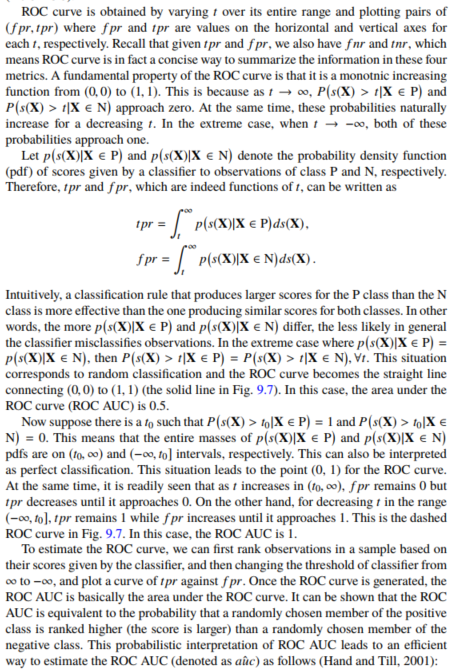

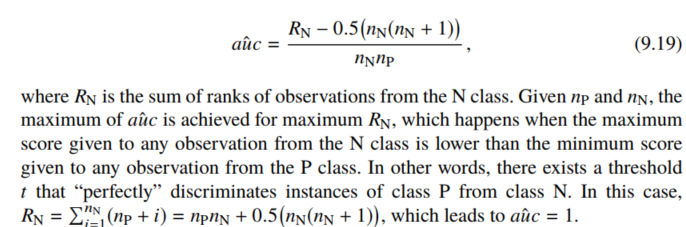

Extension to Multiclass Classification

Other metrics presented for binary classification can be also extended to
multiclass classification (c > 2 classes) by some sort of averaging over a series of
one-versus-rest (OvR), also known one-versus-all (OvA), classification problems. In
this regard, one successively perceives each class as P and all the rest as N, obtain
the metric of performance for the binary classification problem, and then obtain
the average metric across all binary problems.

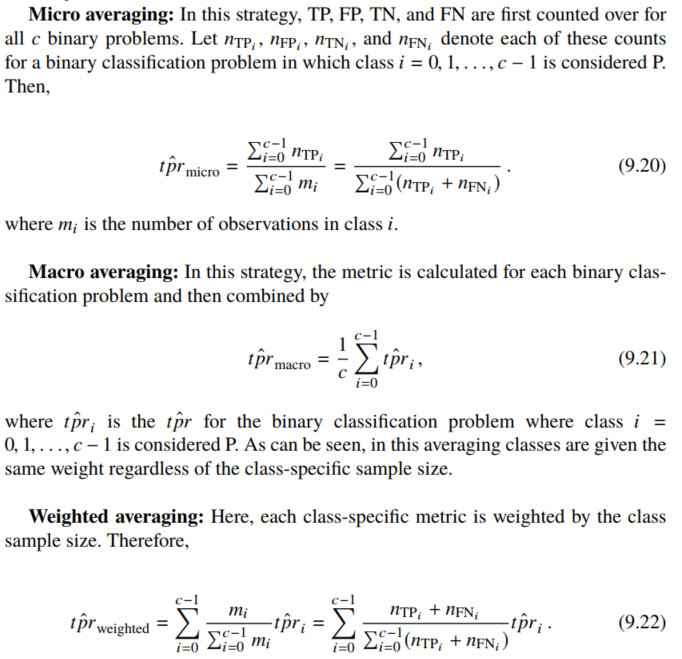

Example 9.3

In [1]:
from sklearn.metrics import precision_score

y_true = [2, 3, 3, 3, 2, 2, 2]
y_pred = [3, 2, 2, 3, 2, 2, 2]

precision_score(y_true, y_pred, pos_label=2)

0.6

Example 9.4

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LRR

iris = datasets.load_iris()
X_train = iris.data
y_train = iris.target
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=100, test_size=0.2, stratify=iris.target)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
+ '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape) + '\n')
lrr = LRR(C=0.1)
y_test_pred = lrr.fit(X_train, y_train).predict(X_test)
print("Accuracy = {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print("Confusion Matrix is\n {}".format(confusion_matrix(y_test, y_test_pred)))
print("Macro Average Recall = {:.3f}".format(recall_score(y_test, y_test_pred, average='macro')))
print("Macro Average Precision = {:.3f}".format(precision_score(y_test, y_test_pred, average='macro')))
print("Macro Average F1 score = {:.3f}".format(f1_score(y_test, y_test_pred, average='macro')))
print("Macro Average ROC AUC = {:.3f}".format(roc_auc_score(y_test, lrr.predict_proba(X_test), multi_class='ovr', average='macro')))

# set "average" to "None" to print these metrics for each class individually (when the class is considered positive)
np.set_printoptions(precision=3)
print("Class-specific Recall = {}".format(recall_score(y_test, y_test_pred, average=None)))
print("Class-specific Precision = {}".format(precision_score(y_test, y_test_pred, average=None)))
print("Class-specific F1 score = {}".format(f1_score(y_test, y_test_pred, average=None)))
print(classification_report(y_test, y_test_pred)) # classification_report is used to print them out nicely

X_train_shape: (120, 4)
X_test_shape: (30, 4)
y_train_shape: (120,)
y_test_shape: (30,)

Accuracy = 0.967
Confusion Matrix is
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Macro Average Recall = 0.967
Macro Average Precision = 0.970
Macro Average F1 score = 0.967
Macro Average ROC AUC = 0.997
Class-specific Recall = [1.  1.  0.9]
Class-specific Precision = [1.    0.909 1.   ]
Class-specific F1 score = [1.    0.952 0.947]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [7]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
K_fold = 3
strkfold = StratifiedKFold(n_splits=K_fold, shuffle=True, random_state=42)
lrr = LRR(C=0.1)
cv_scores = cross_val_score(lrr, X_train, y_train, cv=strkfold, scoring='roc_auc_ovr')
cv_scores

Example 9.5

In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression as LRR

def accuracy_roc_confusion_matrix(clf, X, y):
  y_pred = clf.predict(X)
  acc = accuracy_score(y, y_pred)
  mat = confusion_matrix(y, y_pred)
  y_score = clf.decision_function(X)
  auc = roc_auc_score(y, y_score)
  return {'accuracy': acc,
  'roc_auc': auc,
  'tn': mat[0, 0],
  'fp': mat[0, 1],
  'fn': mat[1, 0],
  'tp': mat[1, 1]}

iris = datasets.load_iris()
X_train = iris.data[iris.target!=0,:]
y_train = iris.target[iris.target!=0]
print('X_train_shape: ' + str(X_train.shape) + '\ny_train_shape: ' + str(y_train.shape) + '\n')
lrr = LRR()
strkfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_validate(lrr, X_train, y_train, cv=strkfold, scoring=accuracy_roc_confusion_matrix)
df = pd.DataFrame(cv_scores)
display(df)
print("the overall 5-fold CV accuracy is: {:.3f}".format(cv_scores['test_accuracy'].mean()))
print("the overall 5-fold CV roc auc is: {:.3f}".format(cv_scores['test_roc_auc'].mean()))
print("the aggregated confusion matrix is:\n {}".format(np.array(df.sum(axis=0)[4:],dtype='int_').reshape(2,2)))

X_train_shape: (100, 4)
y_train_shape: (100,)



fit_time  score_time  test_accuracy  test_roc_auc  test_tn  test_fp  \
0  0.012970    0.009495           0.90          1.00        8        2   
1  0.014960    0.006981           1.00          1.00       10        0   
2  0.010970    0.006981           0.90          0.96        9        1   
3  0.008976    0.007979           0.95          1.00       10        0   
4  0.012967    0.004985           1.00          1.00       10        0   

   test_fn  test_tp  
0        0       10  
1        0       10  
2        1        9  
3        1        9  
4        0       10

the overall 5-fold CV accuracy is: 0.950
the overall 5-fold CV roc auc is: 0.992
the aggregated confusion matrix is:
 [[47  3]
 [ 2 48]]


#### 9.1.3 Evaluation Metrics for Regression

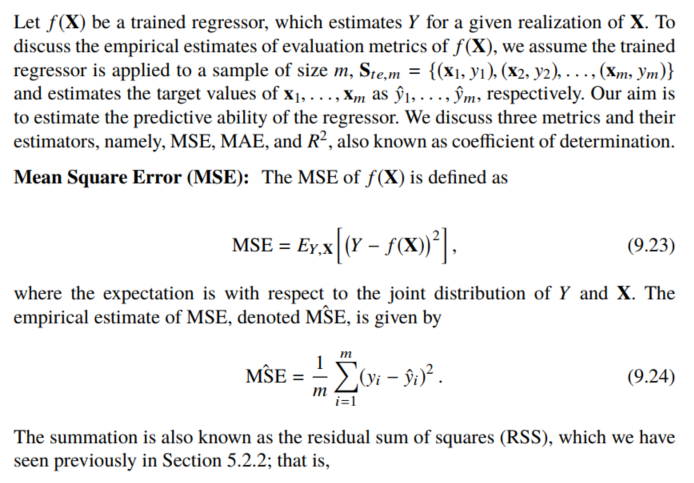

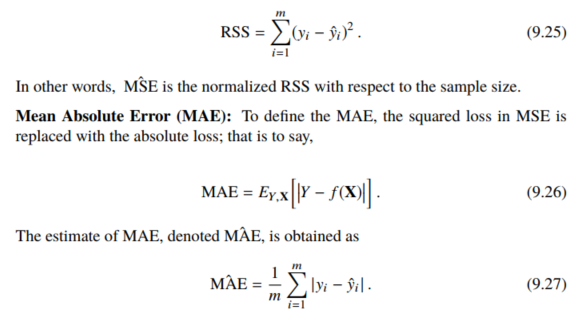

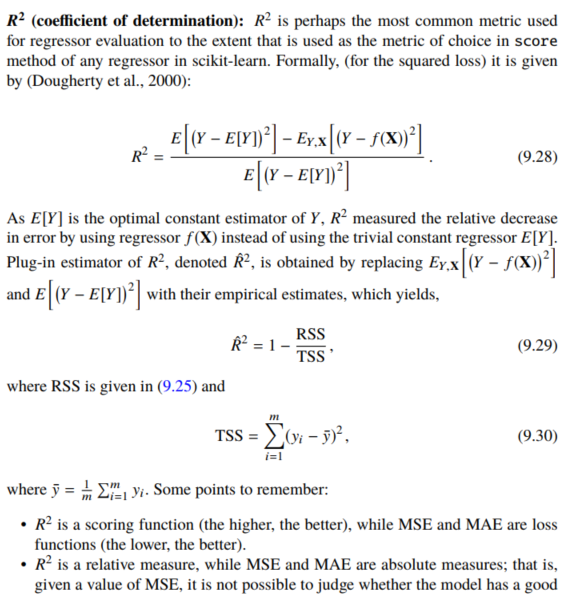

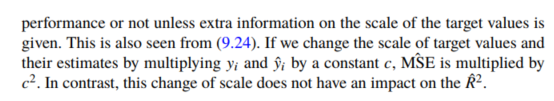

### 9.2 Model Selection

#### 9.2.1 Grid Search

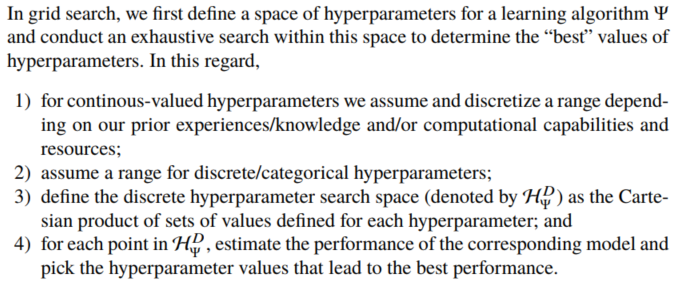

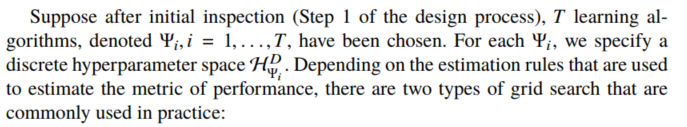

Two types of grid search that are commonly used in practice:
- grid search using validation set
- grid search using cross-validation 

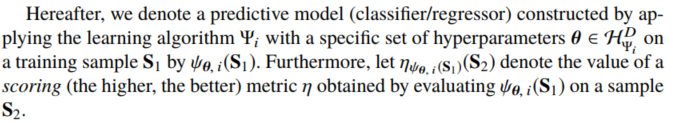

##### Grid search using validation set

- Split the dataset into training, validation, and test sets
- Validation set is used for model selection
- First 75:25 to training and test set, then use the same ratio to split the training set to training and validation set

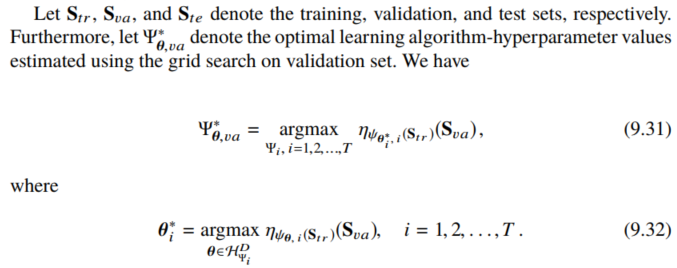

1. (9.32 )Find the optimal hyperparameters for each learning algorithm
2. (9.31) Find the optimal algorithm-hyperparameter

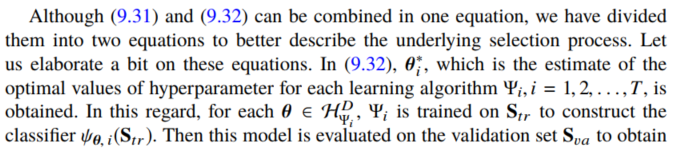

- We can combine $\mathbf{S}_{\text{tr}}$ and $\mathbf{S}_{\text{va}}$ to build a larger set
- The final model is trained by applying the estimated optimal learning algorithm-hyperparameter values $\Psi^{*}_{\mathbf{\theta}, \text{va}}$ to $\mathbf{S}_{\text{tr}} \cup \mathbf{S}_{\text{tr}}$

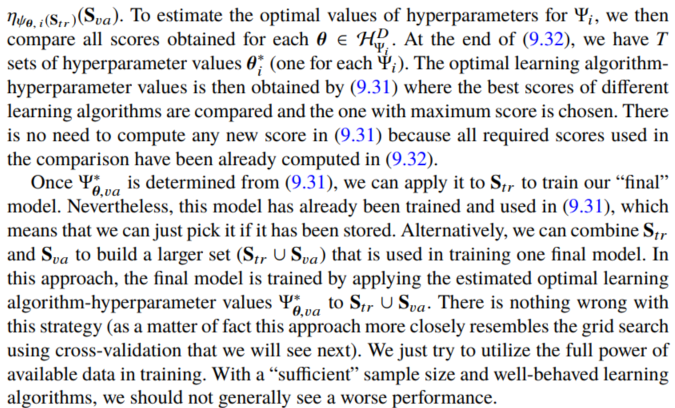

Once the final model is trained/selected, it can be applied on ${\mathbf{S}_\text{te}}$ for evaluation

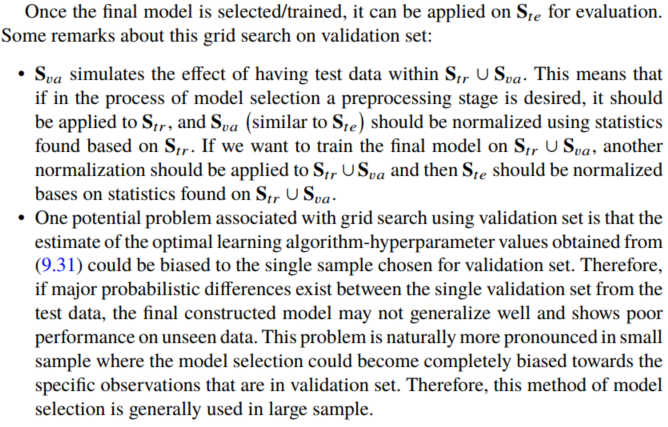

- This means that
if in the process of model selection a preprocessing stage is desired, it should
be applied to $\mathbf{S}_{\text{tr}}$, and $\mathbf{S}_{\text{va}}$
- This method of model selection is generally used in large sample

##### Grid search using cross-validation

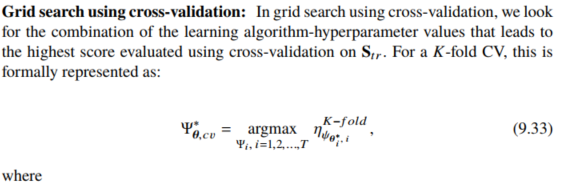

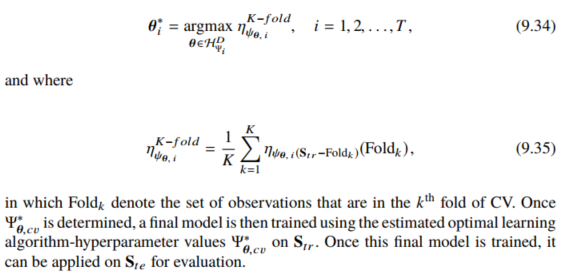

##### Example

In [15]:
# Grid search using cross-validation

import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as LRR
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
iris = datasets.load_iris()
X_train = iris.data
y_train = iris.target
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=100, test_size=0.2, stratify=iris.target)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
+ '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape) + '\n')
lrr = LRR(max_iter=2000)
grids = [{'penalty': ['l2'], 'C': [0.01, 0.1]},
{'penalty': ['elasticnet'], 'C': [0.01, 0.1], 'l1_ratio':[0.2, 0.8], 'solver':['saga']}]
strkfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
gscv = GridSearchCV(lrr, grids, cv=strkfold, n_jobs=-1, scoring = ['accuracy', 'roc_auc_ovr_weighted'], refit='accuracy')
score_best_estimator = gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)
df

X_train_shape: (120, 4)
X_test_shape: (30, 4)
y_train_shape: (120,)
y_test_shape: (30,)

the highest score is: 0.950
the best hyperparameter combination is: {'C': 0.1, 'l1_ratio': 0.2, 'penalty': 'elasticnet', 'solver': 'saga'}
the accuracy of the best estimator on the test data is: 0.967


mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.011147      0.000484         0.008864        0.000469     0.01   
1       0.018358      0.001242         0.009013        0.000004     0.10   
2       0.012007      0.007791         0.009180        0.000941     0.01   
3       0.003838      0.001171         0.008495        0.000816     0.01   
4       0.033370      0.002801         0.005841        0.001956     0.10   
5       0.022512      0.002040         0.009370        0.001031     0.10   

  param_penalty  param_l1_ratio param_solver  \
0            l2             NaN          NaN   
1            l2             NaN          NaN   
2    elasticnet             0.2         saga   
3    elasticnet             0.8         saga   
4    elasticnet             0.2         saga   
5    elasticnet             0.8         saga   

                                              params  split0_test_accuracy  \
0                       {'C': 0.01, 'penalty': 'l2'}                 0.800   
1                        {'C': 0.1, 'penalty': 'l2'}                 0.875   
2  {'C': 0.01, 'l1_ratio': 0.2, 'penalty': 'elast...                 0.675   
3  {'C': 0.01, 'l1_ratio': 0.8, 'penalty': 'elast...                 0.325   
4  {'C': 0.1, 'l1_ratio': 0.2, 'penalty': 'elasti...                 0.900   
5  {'C': 0.1, 'l1_ratio': 0.8, 'penalty': 'elasti...                 0.900   

   ...  split2_test_accuracy  mean_test_accuracy  std_test_accuracy  \
0  ...                 0.875            0.833333           0.031180   
1  ...                 0.975            0.941667           0.047140   
2  ...                 0.800            0.750000           0.054006   
3  ...                 0.325            0.325000           0.000000   
4  ...                 0.975            0.950000           0.035355   
5  ...                 0.950            0.941667           0.031180   

   rank_test_accuracy  split0_test_roc_auc_ovr_weighted  \
0                   4                          0.964850   
1                   2                          0.982977   
2                   5                          0.917575   
3                   6                          0.500000   
4                   1                          0.988675   
5                   2                          0.985844   

   split1_test_roc_auc_ovr_weighted  split2_test_roc_auc_ovr_weighted  \
0                          0.965705                          0.973148   
1                          0.999074                          0.998148   
2                          0.864797                          0.890741   
3                          0.500000                          0.500000   
4                          1.000000                          1.000000   
5                          0.999056                          0.998148   

   mean_test_roc_auc_ovr_weighted  std_test_roc_auc_ovr_weighted  \
0                        0.967901                       0.003727   
1                        0.993400                       0.007380   
2                        0.891038                       0.021547   
3                        0.500000                       0.000000   
4                        0.996225                       0.005339   
5                        0.994349                       0.006026   

   rank_test_roc_auc_ovr_weighted  
0                               4  
1                               3  
2                               5  
3                               6  
4                               1  
5                               2  

[6 rows x 21 columns]

In [17]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as LRR
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, PredefinedSplit
iris = datasets.load_iris()
X, X_test, y, y_test= train_test_split(iris.data, iris.target, random_state=100, stratify=iris.target)
indices = np.arange(len(X))
X_train, X_val, y_train, y_val, indices_train, indices_val=train_test_split(X, y, indices, random_state=100, stratify=y)
ps_ind = np.zeros(len(indices), dtype='int_')
ps_ind[indices_train] = -1 # training set indices are set to -1 and validation set indices are left as 0
print('indices used in CV splitter:\n', ps_ind)
pds = PredefinedSplit(ps_ind)
print('the split used as training and validation sets:\n', *pds.split())
lrr = LRR(max_iter=2000)
grids = [{'penalty': ['l2'], 'C': [0.01, 0.1]},
{'penalty': ['elasticnet'], 'C': [0.01, 0.1], 'l1_ratio':[0.2, 0.8], 'solver':['saga']}]
gscv = GridSearchCV(lrr, grids, cv=pds, n_jobs=-1, scoring =['accuracy', 'roc_auc_ovr_weighted'], refit='accuracy')
score_best_estimator=gscv.fit(X, y).score(X_test, y_test) #gscv is fit on X = X_train+X_val
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)
df

indices used in CV splitter:
 [-1 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0  0 -1 -1  0 -1  0 -1  0 -1 -1 -1
  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1  0 -1  0 -1
  0 -1  0  0 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1]
the split used as training and validation sets:
 (array([  0,   1,   2,   3,   4,   5,   6,  10,  11,  13,  14,  15,  16,
        18,  19,  20,  22,  23,  24,  25,  26,  27,  28,  30,  31,  32,
        33,  34,  35,  38,  39,  41,  43,  45,  46,  47,  49,  51,  53,
        54,  55,  57,  58,  59,  61,  62,  64,  65,  66,  67,  69,  71,
        73,  76,  77,  78,  80,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  94,  95,  96,  97,  98,  99, 100, 101, 103, 105,
       106, 107, 108, 109, 110, 111]), array([  7,   8,   9,  12,  17,  21,  29,  36,  37,  40,  42,  44,  48,
        50,  52,  56,  60,  63,  68

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.013520           0.0         0.008503             0.0     0.01   
1       0.022011           0.0         0.011539             0.0     0.10   
2       0.004987           0.0         0.008528             0.0     0.01   
3       0.004011           0.0         0.008507             0.0     0.01   
4       0.036024           0.0         0.008847             0.0     0.10   
5       0.022019           0.0         0.010490             0.0     0.10   

  param_penalty  param_l1_ratio param_solver  \
0            l2             NaN          NaN   
1            l2             NaN          NaN   
2    elasticnet             0.2         saga   
3    elasticnet             0.8         saga   
4    elasticnet             0.2         saga   
5    elasticnet             0.8         saga   

                                              params  split0_test_accuracy  \
0                       {'C': 0.01, 'penalty': 'l2'}              0.821429   
1                        {'C': 0.1, 'penalty': 'l2'}              0.857143   
2  {'C': 0.01, 'l1_ratio': 0.2, 'penalty': 'elast...              0.785714   
3  {'C': 0.01, 'l1_ratio': 0.8, 'penalty': 'elast...              0.321429   
4  {'C': 0.1, 'l1_ratio': 0.2, 'penalty': 'elasti...              0.857143   
5  {'C': 0.1, 'l1_ratio': 0.8, 'penalty': 'elasti...              0.892857   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
0            0.821429                0.0                   4   
1            0.857143                0.0                   2   
2            0.785714                0.0                   5   
3            0.321429                0.0                   6   
4            0.857143                0.0                   2   
5            0.892857                0.0                   1   

   split0_test_roc_auc_ovr_weighted  mean_test_roc_auc_ovr_weighted  \
0                          0.921575                        0.921575   
1                          0.961257                        0.961257   
2                          0.873538                        0.873538   
3                          0.500000                        0.500000   
4                          0.970969                        0.970969   
5                          0.978697                        0.978697   

   std_test_roc_auc_ovr_weighted  rank_test_roc_auc_ovr_weighted  
0                            0.0                               4  
1                            0.0                               3  
2                            0.0                               5  
3                            0.0                               6  
4                            0.0                               2  
5                            0.0                               1

#### 9.2.2 Random Search

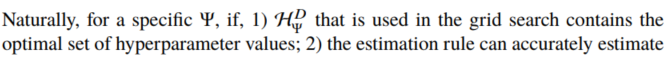

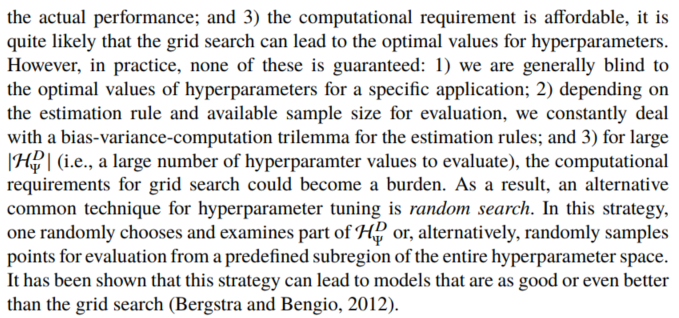

In [19]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as LRR
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from scipy.stats import loguniform, uniform
iris = datasets.load_iris()
X_train = iris.data
y_train = iris.target
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=100, test_size=0.2, stratify=iris.target)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
+ '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape) + '\n')
lrr = LRR(max_iter=2000)
distrs = [{'penalty': ['l2'], 'C': loguniform(0.01, 100)},
{'penalty': ['elasticnet'], 'C': loguniform(0.01, 100),'l1_ratio':uniform(0, 1), 'solver':['saga']}]
strkfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
gscv = RandomizedSearchCV(lrr, distrs, cv=strkfold, n_jobs=-1, scoring= ['accuracy', 'roc_auc_ovr_weighted'], refit='accuracy', n_iter=10, random_state=42)
score_best_estimator=gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)
df.iloc[:,4:9]

X_train_shape: (120, 4)
X_test_shape: (30, 4)
y_train_shape: (120,)
y_test_shape: (30,)

the highest score is: 0.983
the best hyperparameter combination is: {'C': 2.7964859516062464, 'l1_ratio': 0.007066305219717406, 'penalty': 'elasticnet', 'solver': 'saga'}
the accuracy of the best estimator on the test data is: 0.967


param_C param_penalty  param_l1_ratio param_solver  \
0  15.352247            l2             NaN          NaN   
1   8.471801            l2             NaN          NaN   
2   2.440061            l2             NaN          NaN   
3   0.042071    elasticnet        0.058084         saga   
4   0.216189    elasticnet        0.142867         saga   
5   0.012088            l2             NaN          NaN   
6   7.726718    elasticnet        0.938553         saga   
7   0.053370    elasticnet        0.183405         saga   
8   2.796486    elasticnet        0.007066         saga   
9   0.146190            l2             NaN          NaN   

                                              params  
0         {'C': 15.352246941973492, 'penalty': 'l2'}  
1          {'C': 8.471801418819979, 'penalty': 'l2'}  
2          {'C': 2.440060709081755, 'penalty': 'l2'}  
3  {'C': 0.042070539502879395, 'l1_ratio': 0.0580...  
4  {'C': 0.21618942406574443, 'l1_ratio': 0.14286...  
5       {'C': 0.012087541473056965, 'penalty': 'l2'}  
6  {'C': 7.726718477963439, 'l1_ratio': 0.9385527...  
7  {'C': 0.053370327626039576, 'l1_ratio': 0.1834...  
8  {'C': 2.7964859516062464, 'l1_ratio': 0.007066...  
9        {'C': 0.14618962793704965, 'penalty': 'l2'}